In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\imins\Downloads\titanic_dataset.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.drop(columns=['Cabin'],inplace=True)

## Outlier handling

Text(0.5, 1.0, 'Age boxplot')

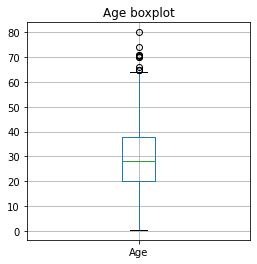

In [11]:
plt.figure(figsize=(4,4))
data.boxplot(column='Age')
plt.title('Age boxplot',fontsize=12)

In [12]:
data.fillna({'Age':data['Age'].median(),'Embarked':data['Embarked'].mode()[0]},inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
outliers_list=['Age','Fare','SibSp']
for i in outliers_list:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    data[i].where(data[i] >=l_lim,l_lim, inplace=True)  
    data[i].where(data[i] <=u_lim,u_lim, inplace=True)  

In [14]:
data.drop(columns=['Name','Ticket','PassengerId'],inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S


## Feature engineering

In [16]:
data['Age'].nunique()

65

In [17]:
data['Age'].unique()

array([22. , 38. , 26. , 35. , 28. , 54. ,  2.5, 27. , 14. ,  4. , 54.5,
       20. , 39. , 31. , 34. , 15. ,  8. , 19. , 40. , 42. , 21. , 18. ,
        3. ,  7. , 49. , 29. , 28.5,  5. , 11. , 45. , 17. , 32. , 16. ,
       25. , 30. , 33. , 23. , 24. , 46. , 37. , 47. , 14.5, 32.5, 12. ,
        9. , 36.5, 51. , 40.5, 44. , 50. , 36. , 45.5, 20.5, 41. , 52. ,
       23.5, 43. , 10. , 13. , 48. , 53. , 24.5,  6. , 30.5, 34.5])

In [18]:
data['Age']=pd.cut(data['Age'],bins=[1,3,10,17,25,40,64,80],labels=['Toddler','Kid','Teenager','Youngster','Adult','Middle Age','Elderly'])
data['Age'] = data['Age'].astype('object') 
data['Age'].value_counts()

Adult         440
Youngster     188
Middle Age    150
Teenager       49
Kid            34
Toddler        30
Name: Age, dtype: int64

In [20]:
X=data.drop('Survived',axis=1)
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [22]:
y=data['Survived']

## One hot encoding

In [23]:
X=pd.get_dummies(X) 
X.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Age_Adult,Age_Kid,Age_Middle Age,Age_Teenager,Age_Toddler,Age_Youngster,Embarked_C,Embarked_Q,Embarked_S
0,3,1.0,0,7.2500,0,1,0,0,0,0,0,1,0,0,1
1,1,1.0,0,65.6344,1,0,1,0,0,0,0,0,1,0,0
2,3,0.0,0,7.9250,1,0,1,0,0,0,0,0,0,0,1
3,1,1.0,0,53.1000,1,0,1,0,0,0,0,0,0,0,1
4,3,0.0,0,8.0500,0,1,1,0,0,0,0,0,0,0,1


## Train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

## Scaling of features

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score,  f1_score
def get_confusion_matrix(y_test,prediction):
    conf_matrix = confusion_matrix(y_test,prediction)
    return conf_matrix
def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1

## Model building and evaluation

### Gaussian Naive Bayes

In [27]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[118  39]
 [ 26  85]]
Accuracy : 0.7574626865671642
F1-score : 0.723404255319149


### Bernoulli Naive Bayes

In [28]:
bnb=BernoulliNB()
bnb.fit(X_train, y_train)
prediction = bnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[130  27]
 [ 32  79]]
Accuracy : 0.7798507462686567
F1-score : 0.7281105990783409


### Multinomial Naive Bayes

In [29]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[134  23]
 [ 32  79]]
Accuracy : 0.7947761194029851
F1-score : 0.7417840375586854


#### Multinomial Naive Bayes has the highest accuracy of 79.47%